# Attempting Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd

In [12]:
train=pd.read_excel("/home/ab1/Desktop/SPH6004/Assignment2/Timestep5_train.xlsx",)
test=pd.read_excel("/home/ab1/Desktop/SPH6004/Assignment2/Timestep5_test.xlsx")
holdout=pd.read_excel("/home/ab1/Desktop/SPH6004/Assignment2/Timestep5_holdout.xlsx")

In [7]:
train["icu_cat"].value_counts()

icu_cat
0    31240
1    20990
2    19215
Name: count, dtype: int64

In [13]:
train_sorted = train.sort_values(by=['id', 'charttime'])
train = train_sorted.groupby('id').tail(1).reset_index(drop=True)

test_sorted = test.sort_values(by=['id', 'charttime'])
test = test_sorted.groupby('id').tail(1).reset_index(drop=True)

holdout_sorted = holdout.sort_values(by=['id', 'charttime'])
holdout = holdout_sorted.groupby('id').tail(1).reset_index(drop=True)

In [14]:
train['id'] = train['id'].astype(str)
test['id'] = test['id'].astype(str)
x_train=train.drop(['los_icu','id','charttime',"icu_death","icu_intime","icu_outtime",'hosp_admittime', 'hosp_dischtime',"hour","race","icu_cat"], axis=1)
y_train=train['icu_cat']



x_test=test.drop(['los_icu','id','charttime',"icu_death","icu_intime","icu_outtime",'hosp_admittime', 'hosp_dischtime',"hour","race","icu_cat"], axis=1)
y_test=test['icu_cat']



In [32]:
y_train

0        1
1        2
2        2
3        1
4        1
        ..
14284    1
14285    1
14286    0
14287    2
14288    2
Name: icu_cat, Length: 14289, dtype: int64

In [91]:
x_holdout=holdout.drop(['los_icu','id','charttime',"icu_death","icu_intime","icu_outtime",'hosp_admittime', 'hosp_dischtime',"hour","race","icu_cat"], axis=1)
y_holdout=holdout['icu_cat']

In [16]:


rf = RandomForestClassifier(
    max_depth=8, 
    min_samples_split=10,
    n_estimators=100,
    random_state=26, 
)

rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=26)

# Feature selection for Random Forest

In [17]:
# Getting feature importance
feature_importances = rf.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]
feature_ranking = []
feature_ranking_total = []
print("Feature ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. Feature {x_train.columns[idx]}: {feature_importances[idx]}")
    feature_ranking.append(x_train.columns[idx])
    feature_ranking_total.append(x_train.columns[idx])

Feature ranking:
1. Feature height: 0.20968453082801597
2. Feature wbc: 0.051068383962380635
3. Feature creatinine: 0.03841463336300109
4. Feature bun: 0.03745503244154296
5. Feature glucose: 0.03615942521323393
6. Feature bicarbonate: 0.033619160751938555
7. Feature admission_age: 0.033455315581277366
8. Feature platelet: 0.030687701342055573
9. Feature admission_type_URGENT: 0.030356326438053853
10. Feature weight_admit: 0.0279239836959183
11. Feature mchc: 0.02755606130591347
12. Feature rdw: 0.02629119267071876
13. Feature calcium: 0.025411803309975594
14. Feature sodium: 0.025402306040144075
15. Feature ptt: 0.024345038505299052
16. Feature hematocrit: 0.023962510913956094
17. Feature rbc: 0.023789834428181906
18. Feature pt: 0.02356569422519047
19. Feature aniongap: 0.022964338712911606
20. Feature potassium: 0.02275465372528924
21. Feature hemoglobin: 0.021482575150983885
22. Feature mch: 0.021297926823189484
23. Feature chloride: 0.01989929115498897
24. Feature mcv: 0.018272558

In [18]:


def forward_feature_selection_f1_test(X, y, X_test, y_test, feature_ranking, model, metric, max_features=None):
    selected_features = []
    best_performance = float('-inf')
    
    if max_features is None:
        max_features = len(feature_ranking)
    
    for feature in feature_ranking:
        selected_features.append(feature)
        X_subset = X[selected_features]
        
        # Train model
        model.fit(X_subset, y)
        
        # Evaluate performance
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict(X_test[selected_features]), pos_label=1, average='macro')
        
        # Check if performance improved
        if performance > best_performance:
            best_performance = performance
            if len(selected_features) == max_features:
                break
        elif performance <= best_performance:
            selected_features.pop()
            break
    
    return selected_features, best_performance

In [19]:
forward_feature_selection_f1_test(x_train, y_train, x_test, y_test, feature_ranking, rf, f1_score, max_features=None)

(['height'], 0.36996916425447735)

In [20]:
print(feature_ranking)

['height', 'wbc', 'creatinine', 'bun', 'glucose', 'bicarbonate', 'admission_age', 'platelet', 'admission_type_URGENT', 'weight_admit', 'mchc', 'rdw', 'calcium', 'sodium', 'ptt', 'hematocrit', 'rbc', 'pt', 'aniongap', 'potassium', 'hemoglobin', 'mch', 'chloride', 'mcv', 'charlson_score', 'inr', 'first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)', 'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)', 'gender', 'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)', 'ckd', 'race_encode_Not Specified', 'admission_type_SURGICAL SAME DAY ADMISSION', 'diabetes', 'admission_type_EW EMER.', 'ihd', 'stroke', 'first_careunit_Surgical Intensive Care Unit (SICU)', 'first_careunit_Trauma SICU (TSICU)', 'malignant_cancer', 'atrial_fibrillation', 'race_encode_Caucasian', 'hypertension', 'chf', 'cld', 'first_careunit_Medical Intensive Care Unit (MICU)', 'admission_type_ELECTIVE', 'race_encode_African', 'first_careunit_Neuro Intermediate', 'first_careunit_Coronary Care U

In [21]:
def backward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric):
    
    best_performance = float('-inf')
    selected_features = feature_ranking.copy()
    model.fit(X, y) 
    y_pred = model.predict(X_test)
    best_performance = metric(y_test, model.predict(X_test), pos_label=1, average='macro')
    for i in range(len(feature_ranking)-1):
        last_feature = selected_features.pop()
        model.fit(X[selected_features], y) 
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict(X_test[selected_features]), pos_label=1, average='macro')
        if best_performance - performance < 0.002:
            best_performance = performance
        else:
            selected_features.append(last_feature)
            break

    
    return selected_features, best_performance

In [22]:
backward_feature_selection_roc_test(x_train, y_train, x_test, y_test, feature_ranking, rf, f1_score)

(['height',
  'wbc',
  'creatinine',
  'bun',
  'glucose',
  'bicarbonate',
  'admission_age',
  'platelet',
  'admission_type_URGENT',
  'weight_admit',
  'mchc',
  'rdw',
  'calcium',
  'sodium',
  'ptt',
  'hematocrit',
  'rbc',
  'pt',
  'aniongap',
  'potassium',
  'hemoglobin',
  'mch',
  'chloride',
  'mcv',
  'charlson_score',
  'inr',
  'first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)',
  'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
  'gender',
  'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)',
  'ckd',
  'race_encode_Not Specified',
  'admission_type_SURGICAL SAME DAY ADMISSION',
  'diabetes',
  'admission_type_EW EMER.',
  'ihd',
  'stroke',
  'first_careunit_Surgical Intensive Care Unit (SICU)',
  'first_careunit_Trauma SICU (TSICU)',
  'malignant_cancer',
  'atrial_fibrillation',
  'race_encode_Caucasian',
  'hypertension',
  'chf',
  'cld',
  'first_careunit_Medical Intensive Care Unit (MICU)',
  'admission_type_ELECTIVE'

In [23]:
# generating the first 2 parent chromosomes for genetic feature selection algorithm

forward_features = ['height']

backward_features = ['height',
  'wbc',
  'creatinine',
  'bun',
  'glucose',
  'bicarbonate',
  'admission_age',
  'platelet',
  'admission_type_URGENT',
  'weight_admit',
  'mchc',
  'rdw',
  'calcium',
  'sodium',
  'ptt',
  'hematocrit',
  'rbc',
  'pt',
  'aniongap',
  'potassium',
  'hemoglobin',
  'mch',
  'chloride',
  'mcv',
  'charlson_score',
  'inr',
  'first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)',
  'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
  'gender',
  'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)',
  'ckd',
  'race_encode_Not Specified',
  'admission_type_SURGICAL SAME DAY ADMISSION',
  'diabetes',
  'admission_type_EW EMER.',
  'ihd',
  'stroke',
  'first_careunit_Surgical Intensive Care Unit (SICU)',
  'first_careunit_Trauma SICU (TSICU)',
  'malignant_cancer',
  'atrial_fibrillation',
  'race_encode_Caucasian',
  'hypertension',
  'chf',
  'cld',
  'first_careunit_Medical Intensive Care Unit (MICU)',
  'admission_type_ELECTIVE',
  'race_encode_African',
  'first_careunit_Neuro Intermediate',
  'first_careunit_Coronary Care Unit (CCU)',
  'copd',
  'admission_type_OBSERVATION ADMIT',
  'race_encode_Hispanic',
  'race_encode_Asian',
  'admission_type_DIRECT EMER.',
  'first_careunit_Neuro Stepdown',
  'admission_type_EU OBSERVATION',
  'race_encode_South American',
  'admission_type_DIRECT OBSERVATION']

forward_parent_chromosome = [1 if feature in forward_features else 0 for feature in feature_ranking_total]
backward_parent_chromosome = [1 if feature in backward_features else 0 for feature in feature_ranking_total]
print(forward_parent_chromosome)
print(backward_parent_chromosome)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [24]:
column_list = x_train.columns.tolist()

In [47]:
len(forward_parent_chromosome)

59

In [25]:
from geneal.genetic_algorithms import BinaryGenAlgSolver

In [39]:


class MyBinaryGenAlgSolver(BinaryGenAlgSolver):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def fitness_function(self, chromosome):
        selected_features = np.where(chromosome)[0]
        selected_features_list = []
        for i in selected_features:
            selected_features_list.append(column_list[i])
        x_train_subset = x_train[selected_features_list]
    
        rf.fit(x_train_subset, y_train)

        x_test_subset = x_test[selected_features_list]

        y_pred =  rf.predict(x_test_subset)

        # Calculate AUROC as the fitness score
        f1 = f1_score(y_test, y_pred, pos_label=1, average='macro')

        return f1
        """
        Example fitness function.
        """
        # This is just a placeholder. You should implement your own fitness function logic here.
        # For example, you could compute a score based on the number of ones in the chromosome.
        #return np.sum(chromosome)

    def initialize_population(self):
        """
        Initializes the population of the problem.
        """
        # Randomly initialize the population using numpy's random.randint method.
        forward_parent_chromosome = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        backward_parent_chromosome =[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
        bits_array = [forward_parent_chromosome, backward_parent_chromosome]
        

        for _ in range(self.pop_size-2):
            bits = np.zeros(self.n_genes)
            bits[: np.random.randint(0, self.n_genes)] = 1
            np.random.shuffle(bits)

            bits_array.append(bits)

        return np.array(bits_array)

    def create_offspring(self, first_parent, sec_parent, crossover_pt, offspring_number):
        """
        Creates an offspring from 2 parents with a random crossover point based on a probability.

        :param first_parent: The chromosome of the first parent.
        :param sec_parent: The chromosome of the second parent.
        :param crossover_prob: The probability of crossover.
        :return: The resulting offspring chromosome.
        """
        n_genes = len(first_parent)
        crossover_mask = np.random.rand(n_genes) < 0.5

    # Select a random crossover point
        crossover_pt = np.random.randint(1, n_genes)

    # Perform crossover based on the crossover mask
        offspring = np.where(crossover_mask, sec_parent, first_parent)

        return offspring

    def mutate_population(self, population, n_mutations):
        """
        Mutates the population by flipping bits randomly.
        """
        mutation_rows, mutation_cols = super(
            BinaryGenAlgSolver, self
        ).mutate_population(population, n_mutations)

        population[mutation_rows, mutation_cols] = np.abs(population - 1)[
            mutation_rows, mutation_cols
        ]

        return population

In [54]:
solver = MyBinaryGenAlgSolver(pop_size=10, n_genes=59, mutation_rate=0.025, max_gen=200, selection_rate=0.3)


Iteration: 20
Best fitness: 0.3711345272062126
Iteration: 40
Best fitness: 0.3746190507280753
Iteration: 60
Best fitness: 0.3757940781487837
Iteration: 80
Best fitness: 0.3769844017434942
Iteration: 100
Best fitness: 0.3839276255856204
Iteration: 120
Best fitness: 0.3839276255856204
Iteration: 140
Best fitness: 0.3839276255856204
Iteration: 160
Best fitness: 0.3839276255856204
Iteration: 180
Best fitness: 0.3839276255856204
Iteration: 200
Best fitness: 0.3839276255856204


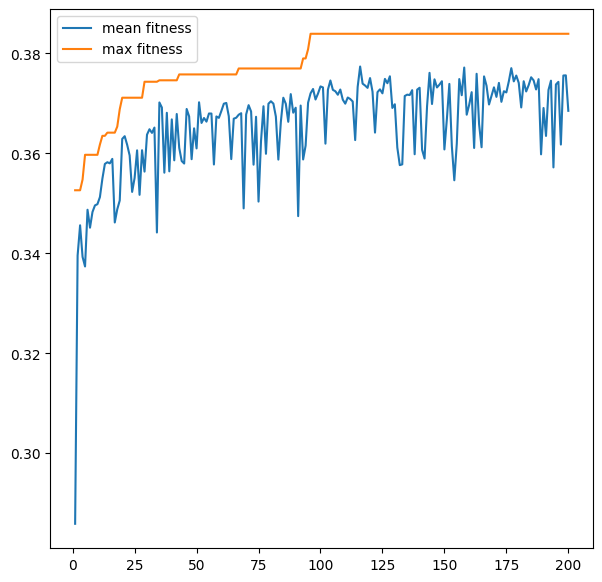


#############################
#			STATS			#
#############################


Total running time: 25 minutes, 27 seconds


Population size: 10
Number variables: 59
Selection rate: 0.3
Mutation rate: 0.025
Number Generations: 200

Best fitness: 0.3839276255856204
Best individual: [0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.]
None


In [55]:
best_solution = solver.solve()
print(best_solution)

In [60]:
solver.best_individual_


array([0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0.])

# Random Forest after feature selection

In [62]:
Best_individual = [0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0.]

selected_features_rf = [feature_ranking_total[i] for i, value in enumerate(Best_individual) if value == 1]
print(selected_features_rf, len(selected_features_rf))

['creatinine', 'glucose', 'bicarbonate', 'admission_type_URGENT', 'rbc', 'pt', 'potassium', 'mcv', 'charlson_score', 'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)', 'gender', 'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)', 'race_encode_Not Specified', 'admission_type_SURGICAL SAME DAY ADMISSION', 'admission_type_EW EMER.', 'stroke', 'atrial_fibrillation', 'cld', 'admission_type_ELECTIVE', 'copd', 'admission_type_OBSERVATION ADMIT', 'race_encode_Hispanic', 'admission_type_DIRECT EMER.', 'admission_type_EU OBSERVATION', 'race_encode_South American'] 25


In [64]:
# Reducing feature dimension of train and test data after genetic algorithm feature selection

x_train_selected_rf = x_train[selected_features_rf]
x_test_selected_rf = x_test[selected_features_rf]
x_holdout_selected_rf = x_holdout[selected_features_rf]

print(x_train_selected_rf.shape)
print(x_test_selected_rf.shape)
print(x_holdout_selected_rf.shape)

(14289, 25)
(4083, 25)
(2042, 25)


# Kfold cross validation + GridSearchCV for Random Forest

In [65]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score

In [66]:
# Combining X_train and X_test together for this GridSearch

X_combined = pd.concat([x_train_selected_rf, x_test_selected_rf], axis=0)

y_combined = pd.concat([y_train, y_test], axis=0)

In [75]:
stratifiedCV = StratifiedKFold(n_splits=5)

scorer = make_scorer(f1_score,average='macro')

rf = RandomForestClassifier(
    random_state=26, 
)

params = {
    'n_estimators': np.arange(50,200,step=50),
    'max_depth':np.arange(start=5,stop=10,step=1),
    'min_samples_split':np.arange(start=8,stop=12,step=1),
}
best_rf = GridSearchCV(
    rf,
    param_grid=params,
    scoring=scorer,
    cv=stratifiedCV)

best_rf.fit(X_combined, y_combined)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=26),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 8,  9, 10, 11]),
                         'n_estimators': array([ 50, 100, 150])},
             scoring=make_scorer(f1_score, average=macro))

In [76]:
best_rf.best_params_

{'max_depth': 9, 'min_samples_split': 10, 'n_estimators': 50}

In [77]:
best_rf.best_score_

0.2925743769816051

In [85]:
# Using cross validation to check metrics and if there is any overfitting

best_rf_selected = RandomForestClassifier(
    max_depth=9, 
    min_samples_split=10,
    n_estimators=50,
    random_state=26, 
)

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

scoring = {
    'precision_1': make_scorer(precision_score, average="macro"),
    'recall_1': make_scorer(recall_score, average="macro"),
    'f1_1': make_scorer(f1_score, average="macro"),
    'accuracy': make_scorer(accuracy_score)
}

# Perform cross-validation
scores = cross_validate(best_rf_selected, X_combined, y_combined, cv=StratifiedKFold(), scoring=scoring, return_train_score=True)

In [86]:
scores

{'fit_time': array([0.36888838, 0.37294841, 0.37088561, 0.37051082, 0.37160993]),
 'score_time': array([0.02233696, 0.02185988, 0.02233171, 0.02182031, 0.021945  ]),
 'test_precision_1': array([0.42021629, 0.39796143, 0.39337756, 0.39075182, 0.42001737]),
 'train_precision_1': array([0.69141923, 0.69638901, 0.69759008, 0.71636366, 0.69645311]),
 'test_recall_1': array([0.37508509, 0.37208131, 0.36147257, 0.36843908, 0.36117489]),
 'train_recall_1': array([0.43862609, 0.43440382, 0.44967915, 0.45048516, 0.43669281]),
 'test_f1_1': array([0.30359428, 0.29571352, 0.28717527, 0.29400138, 0.28238744]),
 'train_f1_1': array([0.39599065, 0.38614729, 0.41310117, 0.4108796 , 0.39240996]),
 'test_accuracy': array([0.45931973, 0.45741497, 0.4458356 , 0.45345672, 0.44828525]),
 'train_accuracy': array([0.51997006, 0.51527523, 0.52823513, 0.53027623, 0.51707715])}

In [94]:
y_pred_test=best_rf.predict(x_test_selected_rf)
y_pred_test=pd.DataFrame(y_pred_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.48      0.97      0.65      1794
           1       0.93      0.07      0.13      1150
           2       0.64      0.23      0.34      1139

    accuracy                           0.51      4083
   macro avg       0.69      0.42      0.37      4083
weighted avg       0.65      0.51      0.42      4083



In [95]:
from sklearn.metrics import classification_report
y_pred_holdout=best_rf.predict(x_holdout_selected_rf)
y_pred_holdout=pd.DataFrame(y_pred_holdout)
print(classification_report(y_holdout,y_pred_holdout))

              precision    recall  f1-score   support

           0       0.45      0.93      0.60       883
           1       0.37      0.01      0.02       614
           2       0.43      0.15      0.22       545

    accuracy                           0.44      2042
   macro avg       0.41      0.36      0.28      2042
weighted avg       0.42      0.44      0.33      2042



## Kfold cross validation + GridSearchCV for XGBoost